## Introduction
This research concentrates on analyzing worldwide COVID-19 case data from the onset of the pandemic in early 2020. We investigate the progression of cases over time and how they are spread among different countries. Additionally, we pinpoint the top 10 countries with the most COVID-19 cases, along with the top 10 countries experiencing the highest death tolls from the virus. A key focus is on understanding these figures in relation to the total populations of the respective countries and their interrelations.

## About the Data
For this study, we will use data from the "[coronavirus](https://ramikrispin.github.io/coronavirus/)" package by Rami Krispin. The coronavirus package provides a tidy format for the COVID-19 dataset collected by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. The dataset includes daily new and death cases between January 2020 and March 2023 and recovery cases until August 2022.

*It is important to acknowledge that COVID-19 data is subject to frequent updates. The information utilized in this analysis was retrieved on February 21, 2024.*

## Setting Up Our Environment

In [1]:
library(tidyverse)
library(scales) # useful to display larger numbers in plots with commas

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Loading the Data

In [2]:
coronavirus <- read_csv("/kaggle/input/coronavirus/coronavirus.csv")

Rows: 919308 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): province, country, type, iso2, iso3, combined_key, continent_name,...
dbl  (6): lat, long, cases, uid, code3, population
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Getting an Overview of the Data

In [3]:
head(coronavirus)

date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2020-01-25,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2020-01-26,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2020-01-27,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA


## Inspecting the Structure of the Data

In [4]:
str(coronavirus)

spc_tbl_ [919,308 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date          : Date[1:919308], format: "2020-01-22" "2020-01-23" ...
 $ province      : chr [1:919308] "Alberta" "Alberta" "Alberta" "Alberta" ...
 $ country       : chr [1:919308] "Canada" "Canada" "Canada" "Canada" ...
 $ lat           : num [1:919308] 53.9 53.9 53.9 53.9 53.9 ...
 $ long          : num [1:919308] -117 -117 -117 -117 -117 ...
 $ type          : chr [1:919308] "confirmed" "confirmed" "confirmed" "confirmed" ...
 $ cases         : num [1:919308] 0 0 0 0 0 0 0 0 0 0 ...
 $ uid           : num [1:919308] 12401 12401 12401 12401 12401 ...
 $ iso2          : chr [1:919308] "CA" "CA" "CA" "CA" ...
 $ iso3          : chr [1:919308] "CAN" "CAN" "CAN" "CAN" ...
 $ code3         : num [1:919308] 124 124 124 124 124 124 124 124 124 124 ...
 $ combined_key  : chr [1:919308] "Alberta, Canada" "Alberta, Canada" "Alberta, Canada" "Alberta, Canada" ...
 $ population    : num [1:919308] 4413146 4413146 4413146 4413146

## Checking Data for Duplicates

In [5]:
sum(duplicated(coronavirus))

[1] 0

The data does not contain any duplicates.

## Analyzing the Data

### What is the Daily Total of Confirmed Cases Since the Onset of the Pandemic?
We want to group the cases by date in order to get the newly confirmed global cases for each date:

In [6]:
coronavirus_cases_by_date <- coronavirus %>% 
  filter(cases >= 0) %>%
  group_by(date) %>% 
  summarize(sum_cases = sum(cases))

head(coronavirus_cases_by_date)

date,sum_cases
<date>,<dbl>
2020-01-22,604
2020-01-23,103
2020-01-24,302
2020-01-25,512
2020-01-26,711
2020-01-27,844


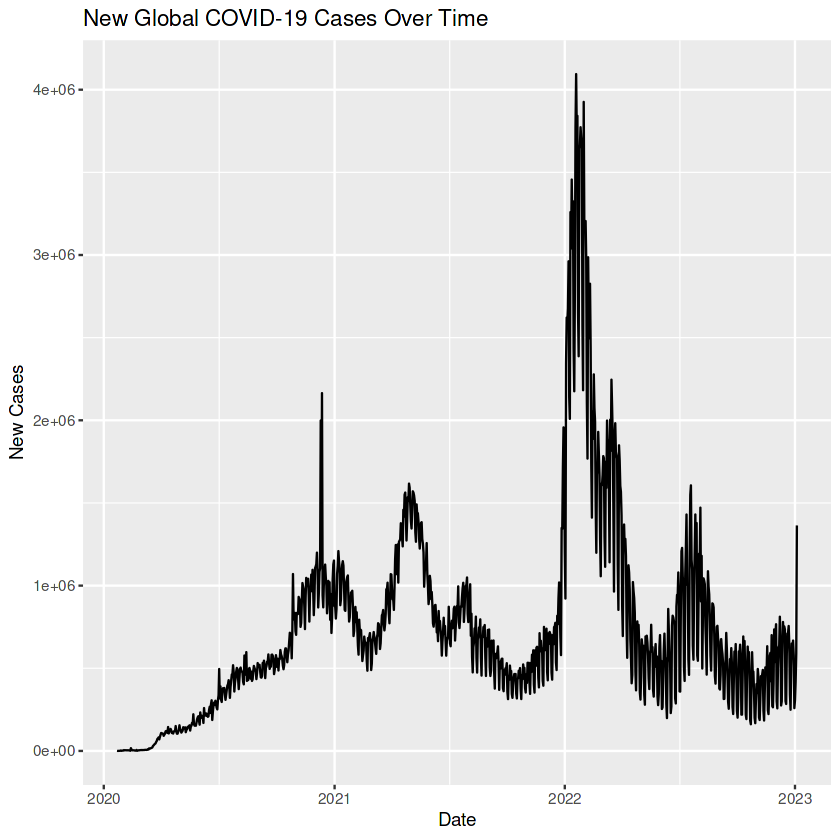

In [7]:
ggplot(data = coronavirus_cases_by_date, aes(x = date, y = sum_cases)) +
  geom_line() +
  labs(title = "New Global COVID-19 Cases Over Time",
       x = "Date",
       y = "New Cases")

The above visualization, which illustrates the trend of new global COVID-19 cases over time, allows for several observations:

* **Initial Outbreak:** At the outset of the timeline, which commences in early 2020, the incidence of new cases was comparably low. This period likely aligns with the virus's initial spread, when testing was not as extensively available.

* **Multiple Infection Waves:** The presence of numerous peaks within the data points to several infection waves throughout the timeframe under consideration. These peaks reflect periods of increased COVID-19 case numbers.

* **Significant Surge:** The timeline shows a pronounced peak around the end of 2021 or the beginning of 2022, indicating a major increase in cases. Possible explanations for this surge include the emergence of new viral variants, decreased observance of preventive measures, or alterations in testing protocols.

* **Post-Peak Decline:** Following the most significant surge, there's a noticeable reduction in new cases, though not to the original minimal levels. This suggests some improvement from the peak period but indicates that COVID-19 remained prevalent globally.

* **Ongoing Variability:** After the decline, the graph shows ongoing variability with smaller peaks, hinting at continued virus transmission and intermittent case increases. These could be attributed to the easing of restrictions, seasonal variations, or the appearance of new variants.

* **Reporting Anomalies:** Notably, the most extreme spikes, especially the largest, may reflect anomalies in data reporting, such as backlog clearing or shifts in data collection practices, leading to abrupt rises in case figures.

### Tracking the Cumulative Rise: How Have Total COVID-19 Cases Evolved Over Time?

In [8]:
# Calculating cumulative cases
coronavirus_cases_by_date$cumulative_cases <- cumsum(coronavirus_cases_by_date$sum_cases)

head(coronavirus_cases_by_date)

date,sum_cases,cumulative_cases
<date>,<dbl>,<dbl>
2020-01-22,604,604
2020-01-23,103,707
2020-01-24,302,1009
2020-01-25,512,1521
2020-01-26,711,2232
2020-01-27,844,3076


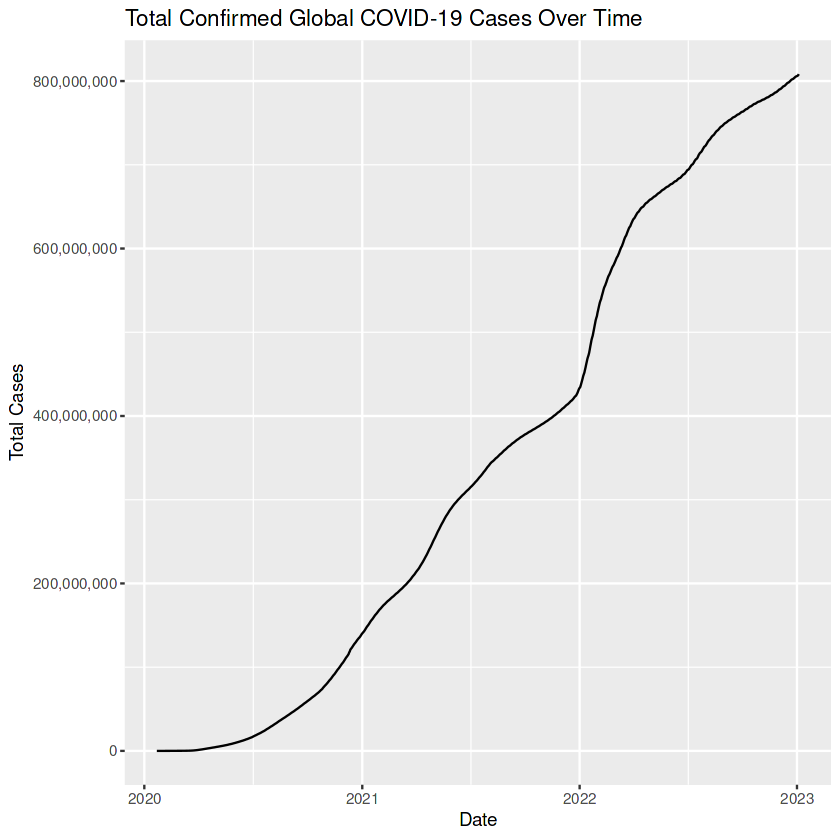

In [9]:
ggplot(data = coronavirus_cases_by_date, aes(x = date, y = cumulative_cases)) +
  geom_line() +
  scale_y_continuous(labels = label_comma()) + # Format the y-axis labels
  labs(title = "Total Confirmed Global COVID-19 Cases Over Time",
       x = "Date",
       y = "Total Cases")

Analyzing the visualization of total confirmed global COVID-19 cases over time, we can deduce:

* The overall trajectory of cases is upward, signifying a continuous global spread of COVID-19.
* A marked uptick in the rate of case accumulation is observed beginning in early 2022, indicating a considerable rise in cases during this time.
* The absence of a leveling off in the curve underscores that new cases continue to be reported, extending into the latest data point in 2023.

### Understanding COVID-19 Impact: Which Countries Have the Highest Total Confirmed Cases?

In [10]:
# Identifying top 10 countries with highest total COVID-19 case count
confirmed_cases_by_country <- coronavirus %>% 
  filter(type == "confirmed") %>%
  group_by(country) %>%
  summarise(total_cases = sum(cases)) %>%
  arrange(-total_cases)

head(confirmed_cases_by_country, 10)

country,total_cases
<chr>,<dbl>
US,101044032
India,44680543
France,39574616
Germany,37475448
Brazil,36423138
Japan,29594073
"Korea, South",29363272
Italy,25143705
United Kingdom,24366259


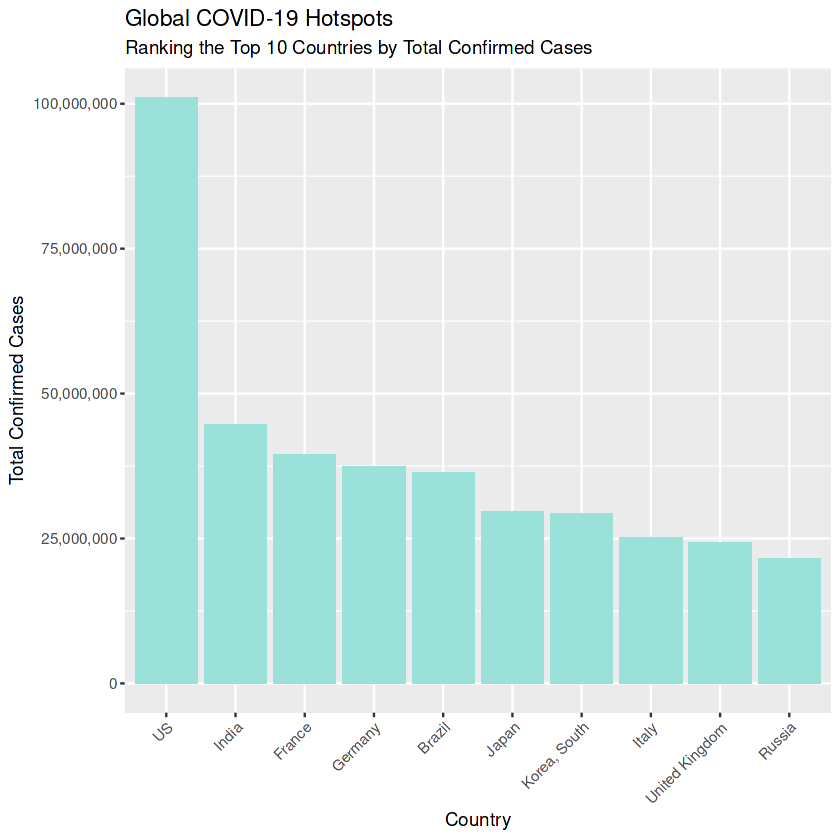

In [11]:
ggplot(head(confirmed_cases_by_country,10), aes(x = reorder(country, -total_cases), y = total_cases)) +
  geom_bar(stat = "identity", fill = "#99E1D9") +
  scale_y_continuous(labels = label_comma()) +
  labs(title = "Global COVID-19 Hotspots",
       subtitle = "Ranking the Top 10 Countries by Total Confirmed Cases",
       x = "Country",
       y = "Total Confirmed Cases") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The visualization depicting the top 10 countries with the highest number of confirmed COVID-19 cases reveals:

* The United States leads with the highest tally of confirmed cases, substantially outpacing other nations in the top 10 list.
* India is second, with its confirmed case count approximately half that of the United States.
* European nations, including France, Germany, Italy, and the United Kingdom, are prominently featured, reflecting intense viral spread within these regions.
* Brazil stands as the representative for South America in the top 10, indicating the pandemic's significant toll there.
* The presence of India, Japan, and South Korea highlights the extensive effect of the virus across various Asian locales.
* A distinct decline in confirmed cases is evident from the top-ranked country to the tenth, with the United States having over twice the number of cases as France, which ranks third.

To enhance our comprehension of the situation, we will next analyze the reported case figures in relation to the overall populations of the specified countries.

In [12]:
coronavirus_cleaned_confirmed <- coronavirus %>%
  filter(!is.na(population), type == "confirmed")

confirmed_cases_by_country <- coronavirus_cleaned_confirmed %>% 
  filter(type == "confirmed") %>%
  group_by(country) %>%
  summarise(total_cases = sum(cases),
  population = max(population)) %>%
  arrange(-total_cases)

head(confirmed_cases_by_country,10)

country,total_cases,population
<chr>,<dbl>,<dbl>
US,101044032,329466283
India,44680543,1380004385
France,39574616,65273512
Germany,37475448,83783945
Brazil,36423138,212559409
Japan,29594073,126476458
"Korea, South",29363272,51269183
Italy,25143705,60461828
United Kingdom,24266706,67886004


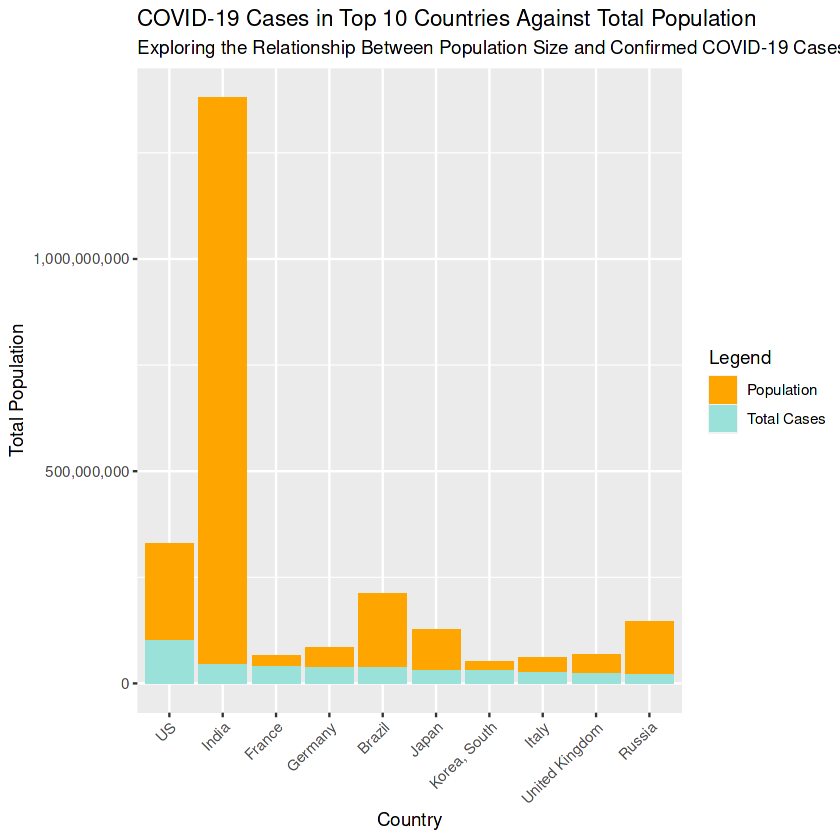

In [13]:
ggplot(head(confirmed_cases_by_country,10), aes(x = reorder(country, -total_cases), y = population)) +
  geom_bar(aes(y = population, fill = "Population"), stat = "identity") +
  geom_bar(aes(y = total_cases, fill = "Total Cases"), stat = "identity") +
  scale_fill_manual(values = c("Population" = "orange", "Total Cases" = "#99E1D9"), name = "Legend") +
  scale_y_continuous(labels = label_comma()) +
  labs(title = "COVID-19 Cases in Top 10 Countries Against Total Population",
       subtitle = "Exploring the Relationship Between Population Size and Confirmed COVID-19 Cases",
       x = "Country",
       y = "Total Population") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

By comparing the two visualizations, which depict the top 10 COVID-19 hotspots and total population vs. confirmed COVID-19 cases, we can draw the following conclusions:

* **Variation in Scale:** The second chart contrasts the total population sizes with the numbers of confirmed COVID-19 cases, highlighting significant variances in population across the countries. For example, the graphical representation of India's population is significantly larger than that of other countries, making the number of confirmed cases seem relatively small in comparison.

* **Challenges in Case Visualization:** In the second chart, the confirmed cases are depicted in a distinct color within the bars representing population sizes. However, this method of visualization faces challenges due to the overwhelming population numbers, especially in countries like India, where the vast population size greatly dwarfs the case figures.

* **Comparison of Cases and Population Sizes:** The second visualization emphasizes that the number of confirmed cases does not directly correspond to population sizes. With the US and India's case numbers placed side by side against the backdrop of the US's smaller population size, it indicates a more significant per capita effect in the US.

* **Interpreting the Visuals:** While the first visualization provides a clear comparison of confirmed cases among countries, the second one plays a crucial role in placing these numbers within the context of each country's total population size, offering a broader perspective on the demographic implications.

### Which Countries Report the Highest Total COVID-19-Related Deaths

In [14]:
# Identifying top 10 countries with highest total COVID-19 death count
deaths_by_country <- coronavirus %>% 
  filter(type == "death") %>%
  group_by(country) %>%
  summarise(total_deaths = sum(cases)) %>%
  arrange(-total_deaths)

head(deaths_by_country, 10)

country,total_deaths
<chr>,<dbl>
US,1095235
Netherlands,833616
Brazil,694411
India,530710
Russia,385971
Mexico,331206
Peru,218304
United Kingdom,213998
Italy,184642


An investigation into further sources online indicates that the placement of the Netherlands as the second-highest in reported figures, with 833,616 cases, significantly deviates from the accurate figure of 23,705 (as reported on February 21, 2024, by Johns Hopkins University). To understand the origins of this discrepancy, a more detailed examination of the COVID-19 data for the Netherlands will be conducted in the following step.

In [15]:
netherlands_data <- coronavirus %>% 
  filter(country == "Netherlands", type == "death")
  
summary(netherlands_data)

      date              province           country               lat       
 Min.   :2020-01-22   Length:5395        Length:5395        Min.   :12.17  
 1st Qu.:2020-10-17   Class :character   Class :character   1st Qu.:12.18  
 Median :2021-07-14   Mode  :character   Mode  :character   Median :12.52  
 Mean   :2021-07-14                                         Mean   :21.41  
 3rd Qu.:2022-04-10                                         3rd Qu.:18.04  
 Max.   :2023-01-04                                         Max.   :52.13  
      long             type               cases               uid       
 Min.   :-69.968   Length:5395        Min.   :   -59.0   Min.   :528.0  
 1st Qu.:-68.990   Class :character   1st Qu.:     0.0   1st Qu.:531.0  
 Median :-68.239   Mode  :character   Median :     0.0   Median :533.0  
 Mean   :-52.992                      Mean   :   154.5   Mean   :532.2  
 3rd Qu.:-63.055                      3rd Qu.:     0.0   3rd Qu.:534.0  
 Max.   :  5.291              

The summary of our data for the Netherlands highlights several potential factors contributing to the issue of an overstated death count:

* **Provinces and Constituent Countries:** The dataset seems to contain multiple records for different provinces or constituent countries, all labeled as "Netherlands." This could result in double-counting if these records are aggregated under a single "Netherlands" category.

* **Negative Case Numbers:** The dataset includes negative case numbers, likely representing adjustments to previously reported data.

* **Data Outliers:** The presence of at least one exceptionally high figure in the cases column (Maximum: 809,919) may be disproportionately inflating the total sum.

In [16]:
# Summarizing death counts at the country level, filtering out negative case numbers
deaths_by_country <- coronavirus %>% 
  filter(cases >= 0, type == "death") %>%
  group_by(country) %>%
  summarise(total_deaths = sum(cases)) %>%
  arrange(-total_deaths)

# Checking the data for the Netherlands specifically by calculating the days with the highest deaths reported
netherlands_deaths <- coronavirus %>% 
  filter(country == "Netherlands", type == "death", cases >= 0) %>%
  group_by(date) %>%
  summarise(daily_deaths = sum(cases)) %>%
  arrange(-daily_deaths)

head(netherlands_deaths, 10)

date,daily_deaths
<date>,<dbl>
2023-01-04,809919
2020-04-07,234
2020-04-15,190
2021-01-05,188
2020-04-16,182
2020-03-31,175
2020-12-29,170
2020-04-02,166
2020-04-04,166


The output clearly identifies a major outlier on January 4, 2023, indicating 809,919 daily deaths, a figure that is exceedingly improbable and likely stems from a data entry mistake or an adjustment for cumulative reporting.

For the purpose of refining our analysis, we will proceed by omitting this outlier from further consideration.

In [17]:
# Filtering out the specific outlier for the Netherlands
coronavirus_filtered <- coronavirus %>% 
  filter(!(country == "Netherlands" & date == as.Date("2023-01-04") & type == "death"))

# Summarizing death counts again without the outlier
deaths_by_country <- coronavirus_filtered %>% 
  filter(type == "death") %>%
  group_by(country) %>%
  summarise(total_deaths = sum(cases, na.rm = TRUE)) %>%
  arrange(-total_deaths)

head(deaths_by_country, 10)

country,total_deaths
<chr>,<dbl>
US,1095235
Brazil,694411
India,530710
Russia,385971
Mexico,331206
Peru,218304
United Kingdom,213998
Italy,184642
France,163541


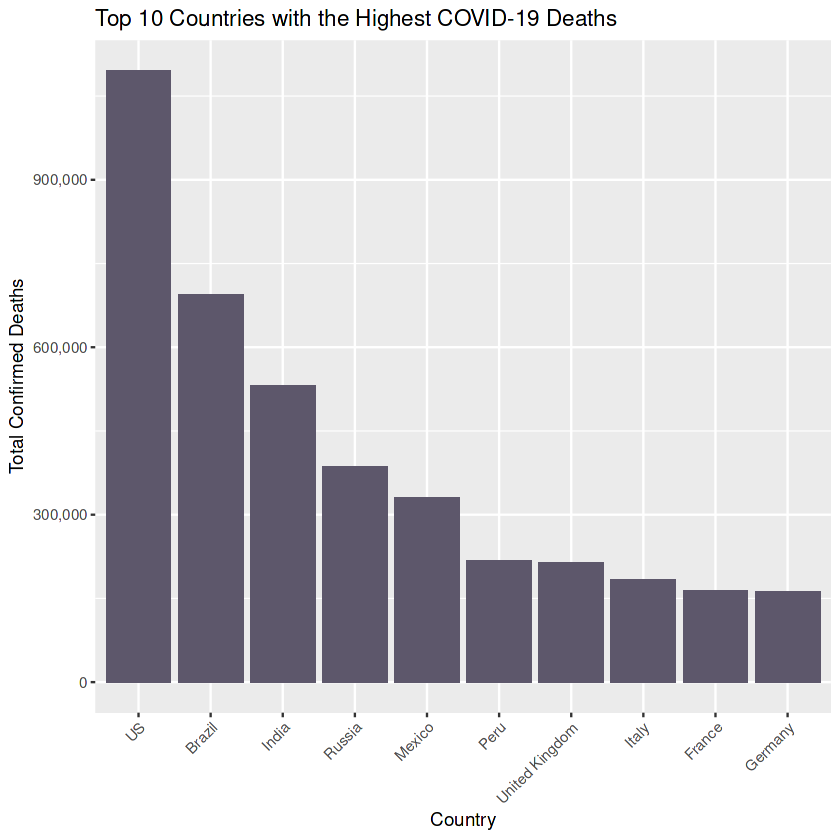

In [18]:
ggplot(head(deaths_by_country,10), aes(x = reorder(country, -total_deaths), y = total_deaths)) +
  geom_bar(stat = "identity", fill = "#5D576B") +
  scale_y_continuous(labels = label_comma()) +
  labs(title = "Top 10 Countries with the Highest COVID-19 Deaths",
       x = "Country",
       y = "Total Confirmed Deaths") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The visualization showcasing the top 10 countries with the highest confirmed COVID-19 deaths permits the following observations:

* The United States occupies the foremost position in terms of confirmed fatalities, followed by Brazil, India, and Russia, in that order.
* There is a clear sequential decrease in death counts from the United States onwards, with the US experiencing a notably higher number of deaths compared to the rest.
* The death toll in the initial four countries (the US, Brazil, India, and Russia) markedly surpasses that in the remaining six, highlighting a more pronounced effect in terms of loss of life in these nations.
* The presence of European nations such as the United Kingdom, Italy, Germany, and France on this list underscores the significant mortality experienced in Europe.
* The inclusion of Latin American countries—Brazil, Mexico, and Peru—among the top 10 underscores the grave repercussions of COVID-19 in this region.

In our effort to gain a clearer perspective on the death tolls, we will proceed to evaluate them against the total confirmed cases of the countries mentioned.

In [19]:
coronavirus_cleaned_deaths <- coronavirus_filtered %>%
  filter(!is.na(population), type == "death")

deaths_by_country <- coronavirus_cleaned_deaths %>% 
  filter(type == "death") %>%
  group_by(country) %>%
  summarise(total_deaths = sum(cases),
  population = max(population)) %>%
  arrange(-total_deaths)

head(deaths_by_country, 10)

country,total_deaths,population
<chr>,<dbl>,<dbl>
US,1095235,329466283
Brazil,694411,212559409
India,530710,1380004385
Russia,385971,145934460
Mexico,331206,127792286
Peru,218304,32971846
United Kingdom,213786,67886004
Italy,184642,60461828
France,163541,65273512


In [20]:
# Merging the confirmed_cases_by_country and deaths_by_country data frames
merged_confirmed_vs_deaths <- merge(confirmed_cases_by_country, deaths_by_country, by = c("country", "population"), all = TRUE)

head(merged_confirmed_vs_deaths, 10)

,country,population,total_cases,total_deaths
,<chr>,<dbl>,<dbl>,<dbl>
1,Afghanistan,38928341,207715,7850
2,Albania,2877800,333818,3596
3,Algeria,43851043,271236,6881
4,Andorra,77265,47751,165
5,Angola,32866268,105095,1930
6,Antigua and Barbuda,97928,9106,146
7,Argentina,45195777,9963697,130171
8,Armenia,2963234,445976,8716
9,Australia,8118000,11136734,17112


In [21]:
# Reordering the merged_confirmed_cases_vs_deaths data frame to get top 10 deaths
merged_confirmed_vs_deaths <- merged_confirmed_vs_deaths %>% 
  arrange(-total_deaths)

head(merged_confirmed_vs_deaths, 10)

,country,population,total_cases,total_deaths
,<chr>,<dbl>,<dbl>,<dbl>
1,US,329466283,101044032,1095235
2,Brazil,212559409,36423138,694411
3,India,1380004385,44680543,530710
4,Russia,145934460,21505701,385971
5,Mexico,127792286,7257916,331206
6,Peru,32971846,4460100,218304
7,United Kingdom,67886004,24266706,213786
8,Italy,60461828,25143705,184642
9,France,65273512,39574616,163541


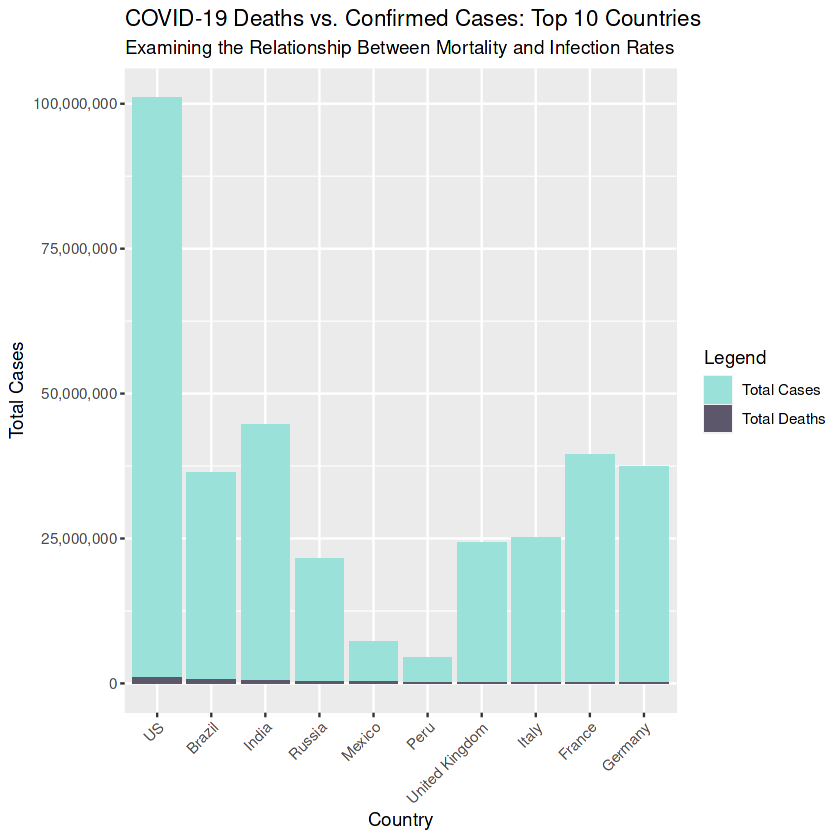

In [22]:
# Visualizing total confirmed cases vs. total deaths
ggplot(head(merged_confirmed_vs_deaths,10), aes(x = reorder(country, -total_deaths), y = total_cases)) +
  geom_bar(aes(y = total_cases, fill = "Total Cases"), stat = "identity") +
  geom_bar(aes(y = total_deaths, fill = "Total Deaths"), stat = "identity") +
  scale_fill_manual(values = c("#99E1D9", "#5D576B"), name = "Legend", labels = c("Total Cases", "Total Deaths")) +
  scale_y_continuous(labels = label_comma()) +
  labs(title = "COVID-19 Deaths vs. Confirmed Cases: Top 10 Countries",
       subtitle = "Examining the Relationship Between Mortality and Infection Rates",
       x = "Country",
       y = "Total Cases") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

The chart above clearly shows that the COVID-19 death toll in each of the leading 10 countries constitutes merely a small portion of the total number of COVID-19 cases. This prompts us to inquire about the actual percentage of COVID-19 infections that lead to fatalities.

In [23]:
# Calculating death percentage for each country
merged_confirmed_vs_deaths <- merged_confirmed_vs_deaths %>% 
  mutate(deaths_in_percent = total_deaths / total_cases * 100)

head(merged_confirmed_vs_deaths, 10)

,country,population,total_cases,total_deaths,deaths_in_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,US,329466283,101044032,1095235,1.0839185
2,Brazil,212559409,36423138,694411,1.9065106
3,India,1380004385,44680543,530710,1.1877877
4,Russia,145934460,21505701,385971,1.7947381
5,Mexico,127792286,7257916,331206,4.5633760
6,Peru,32971846,4460100,218304,4.8945988
7,United Kingdom,67886004,24266706,213786,0.8809848
8,Italy,60461828,25143705,184642,0.7343468
9,France,65273512,39574616,163541,0.4132472


It is now apparent that in the US, 1.08% of all confirmed COVID-19 cases ended deadly, with Brazil at 1.91% and India at 1.19%. Meanwhile, Mexico's mortality rate stands at 4.56%, and Peru's is even more significant at 4.89%. This observation leads us to the next step of determining which countries have the highest death percentages in relation to their confirmed COVID-19 case counts.

In [24]:
merged_confirmed_vs_deaths <- merged_confirmed_vs_deaths %>% 
  arrange(-deaths_in_percent)

head(merged_confirmed_vs_deaths, 10)

,country,population,total_cases,total_deaths,deaths_in_percent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Yemen,29825968,11945,2159,18.074508
2,Sudan,43849269,63686,4994,7.841598
3,Syria,17500657,57423,3163,5.508246
4,Somalia,15893219,27310,1361,4.983523
5,Peru,32971846,4460100,218304,4.894599
6,Egypt,102334403,515645,24802,4.809898
7,Mexico,127792286,7257916,331206,4.563376
8,Bosnia and Herzegovina,3280815,401058,16230,4.046796
9,Afghanistan,38928341,207715,7850,3.779217


The data presented in the table clearly indicates that Yemen, despite its relatively low count of 11,945 confirmed COVID-19 cases, exhibits a significantly high mortality rate of 18.07%, translating to 2,159 deaths. This rate surpasses that of the second-ranked country, Sudan, by more than double. Sudan has reported 63,686 confirmed cases of COVID-19, leading to 4,994 deaths, with a mortality rate of 7.84%.

## Conclusion
The analysis reveals the top 10 countries with the highest COVID-19 mortality rates. Here are some potential reasons why certain countries, with Yemen being a primary example, are experiencing disproportionately high death tolls:

* **Healthcare Infrastructure:** Nations such as Yemen, Sudan, and Syria have been ravaged by prolonged conflicts, resulting in severely damaged healthcare infrastructures. The limited availability of medical services, scarce medical supplies, and a shortage of healthcare workers critically affect the capability to effectively manage COVID-19, leading to increased fatalities.

* **Testing and Reporting Efficiency:** The ability to conduct widespread testing and accurately report COVID-19 cases is essential for effective containment and treatment. Lower testing rates might result in underreported case numbers but a higher reported death count, artificially inflating the mortality rate. Countries with inadequate testing facilities often identify only the most critical cases, which are more likely to be fatal.

* **Economic Challenges:** Economic instability can worsen the pandemic's impact. In economically disadvantaged countries like Somalia and Afghanistan, there might be insufficient access to personal protective equipment, hygiene supplies, and healthcare resources, facilitating the virus's spread and elevating death counts.

* **Population Demographics:** While the demographic makeup, including age distribution and chronic health conditions, affects COVID-19 mortality rates, in the mentioned countries, factors such as general health and nutritional status may play a more significant role than age demographics alone.

* **Public Health Strategies:** The success of public health interventions, such as lockdowns, social distancing, and mask-wearing, differs greatly among countries. Ineffective implementation and compliance with these measures can lead to increased virus transmission and, consequently, higher mortality rates.

* **International Assistance and Resources:** Access to international aid, encompassing vaccines, medical supplies, and healthcare expertise, is critical. Nations that are politically isolated or have limited international relations may struggle to obtain the support needed to effectively tackle the pandemic.

* **Cultural and Social Practices:** Cultural norms and social behaviors can influence virus spread and adherence to health guidelines. In some regions, practices like large family gatherings and shared living situations may accelerate virus transmission.

In conclusion, the heightened COVID-19 death rates in these countries are attributed to a complex mix of healthcare-related, economic, demographic, and socio-political challenges. Addressing these issues demands a comprehensive strategy that includes bolstering healthcare systems, improving testing and reporting, fostering economic stability, and encouraging effective public health practices. The contribution of the international community in offering aid and resources is vital for alleviating the effects of COVID-19 in these high-risk areas.

## Negative Case Numbers in the Data Explained
The coronavirus dataset computes daily new cases (confirmed, recovered, and deaths) by calculating the difference between each day's total and that of the previous day. Consequently, instances of negative cases may arise when there's a reduction in the cumulative case count relative to the prior day. Such discrepancies have been observed under several circumstances:

* Modifications in the methodology or source of case counting, as exemplified by specific documented issues.
* Adjustments in case numbers (including the correction of false positives) that are not recorded on the actual day of occurrence.
* Inaccuracies present within the raw data.

## MIT License / Data Copyright
Copyright (c) 2020 Rami Krispin

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
